
<details>
<summary> <h1 id="custom-id">Introduction</h1></summary>
* Hello, our names are Dan, Dave, and Geary
* This is our project detailing the process undertaken to predict if a Piece should be Highlighted (`is_highlight`)


<details>
<summary> <h2 id="custom-id">Project Objective</h2></summary>
> Document code, process data (through entire pipeline), and articulate key findings and takeways
* Create modules that faciliate project repeatability, as well as final report readability
> Ask/Answer exploratory questions of data and attributes to understand drivers of `Highlight`  
* Utilize charts and statistical tests
> Construct models to predict `Highlight` using classification modeling techniques and Feature Engineering 
> Make recommendations


<details>
<summary> <h2 id="custom-id">Project Business Goals</h2></summary>
> Construct ML Classification model that accurately predicts `Highlight`
* `Highlight` = Target Class 
> Find key features of `Highlight`
> Deliver report that the data science team can read through and replicate  
> Share steps were taken, why and what the outcome was.
> Make recommendations on what works or doesn't work in predicting `Highlight`

<details>
<summary> <h2 id="custom-id">Executive Summary</h2></summary>
* Relied on clustering and feature weights for a bulk of feature differientation to predict `Highlight`
* Feature sets informed by the combination of Feature Engineering and Clustering/Feature Weights.
* Model gain on predictive performance vs. baseline prediction was minimal on test set (still was able to __________)

In [1]:
##imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.feature_selection import RFE, SelectKBest, f_regression

import wrangle
import explore


import warnings
warnings.filterwarnings("ignore")


## Wrangle (Acquire and Prep)
<details>
<summary> <h2 id="custom-id">Steps taken</h2></summary>  


> Look for csv, Key Feature Names are:
- `the_libraries`
- `has_artist_url`
- `object_wikidata`
> Returns a dataframe that is cleaned from source (MetMuseum): 
- Features renamed; dropped features with low relevance (artist_prefix), remapped/consolidated features to threshold, filled NaN
* Feature Engineering
> Features:
- `feature_weighed`: Weight of features related to target from `classification`,`credit_line`,`country`, `tags`, `medium`
- `strong_yes`: Clusters of features from various-`departments`,`is_timeline`,`culture_American`, and `medium_None` 
- `strong_no`: Clusters of features from various-`departments`,`object_name_Print`,`credit_line TJRBC`, `object_name_Kylix fragment`, `portfolio` 
> Split:  
- Train: 60%  
- Validate: 20%  
- Test: 20%   
> Summary  
- Visualized distinctions within the data to inform exploratory analysis  
    

In [2]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test, df, target = wrangle.initalize_museum(new=True)
#df.info()

Prepared df: (477804, 27)

Train: (286682, 27)
Validate: (95561, 27)
Test: (95561, 27)
df -> (477804, 103)
train -> (286682, 105)
validate -> (95561, 105)
test -> (95561, 105)


# Exploration
- Initial phase - Guidance

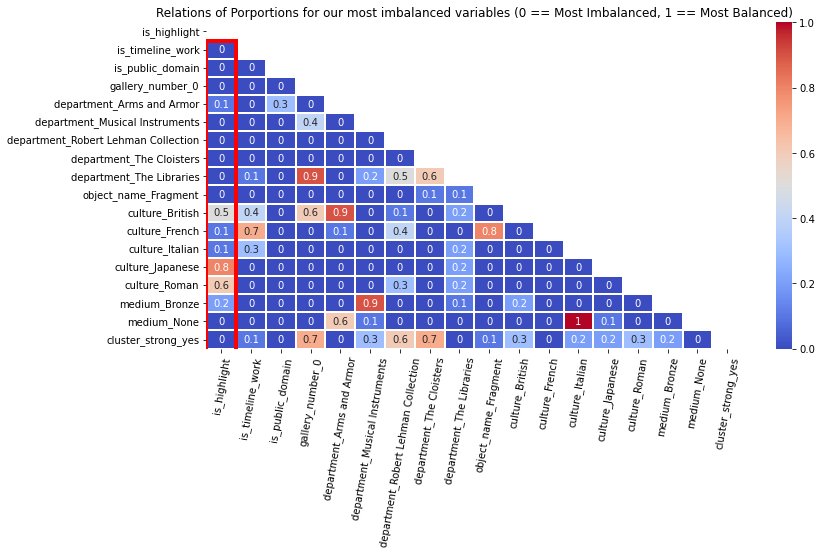

In [3]:
##expect about 2.5 minutes runtime
explore.ki_squared_for_explore(train,threshold=.75)

### Takeaway 
- Is_timeline_work, is_public_domain, gallery_number_0, departments: A-A, M-I, R-L-C, T-C, and T-L, object_Fragment, cultures: French, Italian, medium_None, will be worth investigating (these ended up becoming drivers of our creation of Cluster_Strong_Yes)

# <hr style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

Let's investigate if our Departments contain inequal porportions of `Is Highlight` with enough deviance to be considered significant

##  **Hypothesis 1 - Is the count of  `is_highlight` for each Department in Department relative in relation to the other Departments for the count of `is_highlight`**

> $H_0$: The count of values for `Department_each` will not be signifcantly different from each other in porportion.    
> $H_a$: Rejection of Null ~~The count of values for `Department_each` will not be signifcantly different from each other in porportion.~~  
> alpha = .05  
> - Conclusion: There is enough evidence to reject our null hypothesis for SOME cases, department overall did have inequal porportions

---
chi^2 = 21847.8911, p = 0.00000, degf = 18
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  D̶e̶p̶a̶r̶t̶m̶e̶n̶t̶ ̶i̶s̶ ̶n̶o̶t̶ ̶d̶i̶f̶f̶e̶r̶e̶n̶t̶ ̶i̶n̶ ̶t̶h̶e̶ ̶p̶o̶r̶p̶o̶r̶t̶i̶o̶n̶s̶ ̶o̶f̶ ̶I̶s̶ ̶H̶i̶g̶h̶l̶i̶g̶h̶t̶ )


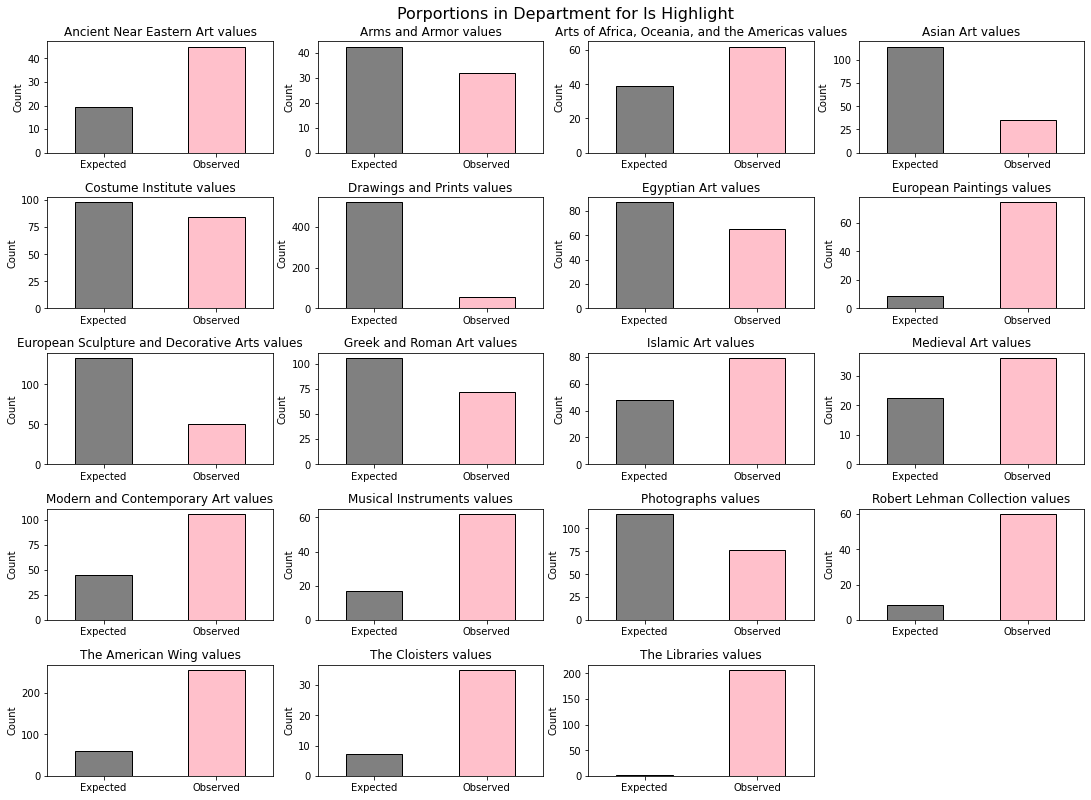

In [4]:
explore.chi2_for_feature(train,"department")

## Q1 Takeaway:
- There are unequal porportions in `is highlight` for the departments.  
  - With focus on ['The Libraries', 'European Paintings', 'Robert Lehman Collection', 'The Cloisters', 'The American Wing', 'Musical Instruments', 'Modern and Contemporary Art'].  
  - While others being ignored ['Drawings and Prints', 'Asian Art', 'European Sculpture and Decorative Arts', 'Photographs', 'Greek and Roman Art']. 

# <hr style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

Does Culture contain inequal porportions of `Is Highlight` with enough deviance to be considered significant

##  **Hypothesis 2 - Is the count of  `is_highlight` for each Department in Department relative in relation to the other Departments for the count of `is_highlight`**

> $H_0$: The count of values for `Department_each` will not be signifcantly different from each other in porportion.    
> $H_a$: Rejection of Null ~~The count of values for `Department_each` will not be signifcantly different from each other in porportion.~~  
> alpha = .05  
> - Conclusion: There is enough evidence to reject our null hypothesis for SOME cases, department overall did have inequal porportions

---
chi^2 = 2686.0246, p = 0.00000, degf = 9
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  O̶b̶j̶e̶c̶t̶ ̶N̶a̶m̶e̶ ̶i̶s̶ ̶n̶o̶t̶ ̶d̶i̶f̶f̶e̶r̶e̶n̶t̶ ̶i̶n̶ ̶t̶h̶e̶ ̶p̶o̶r̶p̶o̶r̶t̶i̶o̶n̶s̶ ̶o̶f̶ ̶I̶s̶ ̶H̶i̶g̶h̶l̶i̶g̶h̶t̶ )


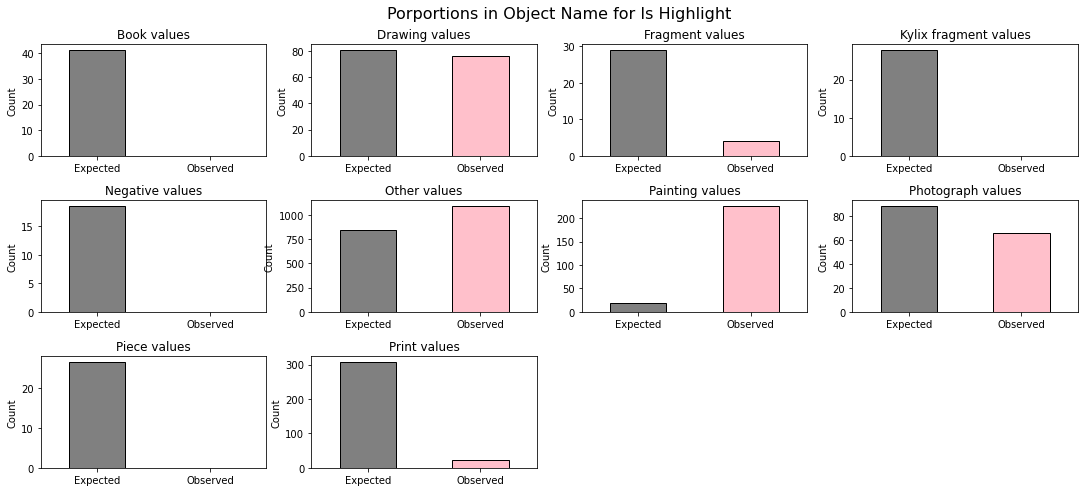

In [5]:
explore.chi2_for_feature(train,"object_name")

## Q2 Takeaway:
- There are unequal porportions in `is highlight` for the Culture.  
  - With focus on ['Painting', and what is basically miscellaneous].  
  - While others being ignored ['Book', 'Fragement', 'Kylix', 'Negatives', 'Piece' and 'Print']. 

# <hr style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

Why are there features in The Libraries that are not in our highlight? What features do they have in common?
##  **Question 3 - What makes the outliers in The Libraries special?**

>Conclusion: Lack of information on the targets may be part of why they're not Highlight pieces, or there may be bias uncaptured in the features reviewed


In [6]:
train.groupby(["department_The Libraries"]).is_highlight.mean()

department_The Libraries
0    0.004479
1    0.971831
Name: is_highlight, dtype: float64

We see there is an overwhelming rate of acceptance into the `is_highlight`, what could make these few special?

In [7]:
train[(~train["is_highlight"]) & (train["department_The Libraries"]!=0)][["title","artist_alpha_sort","department","object_wikidata_url","has_artist_url","culture","medium","cluster_strong_yes","gallery_number"]].set_index("title")

,artist_alpha_sort,department,object_wikidata_url,has_artist_url,culture,medium,cluster_strong_yes,gallery_number
title,,,,,,,,
A secretary to the spirits,"Reed, Ishmael",The Libraries,0,False,Unknown,None,1,999
"Resistance, dignity, and pride : African American artists in Los Angeles","Von Blum, Paul",The Libraries,0,False,Unknown,None,1,999
Wisdom of the ancestors : African proverbs compiled,"Edwards, Ruth E.",The Libraries,0,False,Unknown,None,1,999
"Riddle ma riddle as I suppose : riddles from the Sea Islands, South Carolina","Kennedy, Amos",The Libraries,0,False,Unknown,None,1,999
Tenderness,"Johnson-Ricks, Khari",The Libraries,0,False,Unknown,None,1,999
Trenton Doyle Hancock : mind of the mound : critical mass,"Markonish, Denise",The Libraries,0,False,Unknown,None,1,999


### Takeaway
- > The features shared by these titles only vary with the author. They're all held in the same gallery in The Libraries, lack info on the object, artist does not have wiki link in data, and the cultures are unknown. Further exploration into these features may yield results into bias from the Curators.

In [8]:

train[[ "object_wikidata_url_1_or_0",
        "has_artist_url",
        "culture",
        "medium",
        "gallery_number",
        "department",
        "is_highlight"]][train["is_highlight"]].groupby(["has_artist_url",
                                                        "culture",
                                                        "medium",
                                                        "gallery_number",
                                                        "object_wikidata_url_1_or_0",
                                                        "department",
                                                        ]).agg("count").reset_index().sort_values(by="is_highlight")

,has_artist_url,culture,medium,gallery_number,object_wikidata_url_1_or_0,department,is_highlight
88,False,Unknown,Other,0,1,The Libraries,1
34,False,Japanese,Other,0,0,Musical Instruments,1
83,False,Unknown,Other,0,1,Drawings and Prints,1
127,True,Other,Bronze,0,1,European Sculpture and Decorative Arts,1
38,False,Japanese,Other,999,1,Musical Instruments,1
...,...,...,...,...,...,...,...
164,True,Unknown,Other,0,1,Drawings and Prints,45
93,False,Unknown,Other,999,1,Egyptian Art,60
172,True,Unknown,Other,999,1,European Paintings,62
77,False,Unknown,None,0,0,The Libraries,92


Looking at our data, we can conclude that pieces often highlighted are likely to have more information on the piece than the artist. With target audience largely in mind for curation (American culture, American wing)

# <hr style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

Let's see if our ________ that contained inequal distributions have enough "oomph" to be considered significant
##  **Hypothesis 4 - Are the mean values of ________ equal to each other in relation to ________**
> - alpha = .05
> - $H_0$: The mean values of `________` will not be signifcantly different from `________` relating `________`.  
> - $H_a$: Rejection of Null ~~The mean values of `________` will not be signifcantly different from `________` relating `________`.~~  
> Conclusion: There is enough evidence to ________ our null hypothesis for all cases

## Explore Takeaways
 - Feature `________` hold value in determining ________ and will be used in modeling
 - Engineer Feature `________` will also be useful in modeling as a way to predict ________ with it's high deviance depending on ________
 - We have isolated ________ from our groups that will also provide benefit and will be utilized in modeling
 - Features to direct in our modeling phase: `________`, `________`, `________`, `________`, `________`

# Modeling

In [9]:
from model import prep_X_sets, make_model

### Takeaways
* During initial testing a lot looks like it needs to be tweaked due to small size of our target variable, and only categorical
* `Target == False` is set as our baseline due to it being the majority of cases (99.5%)
* Only 0.5% of sample is `Target` ('is_highlight') our target Class
-----------
* After continued testing using the main classfiers we were able to hypertune the parameters, optimizing for high recall on the validate set
* Most models did pretty well at this point, being able to identify 50% of our target variable correctly
-----------
* For additional testing we could resample at a more even rate of the target variable ('is_higlight')
-----------
* Models primarily compared via Precision and Recall (F1 score)
* A Cross-Validated Decision tree was the third best model, maxing out at 60% recall in sample
-----------
* `XGBClassifier` with a max depth of 10 was amazing in it's performance in sample, but lagged behind in out of sample data and makes a strong argument for being considered over-fit
* `Extreme Gradient Boost with Binary Logistic Regression`, allowed to exit training early was the best model that i could have faith would not lead to massive overfitting moving forward. Acheieving 50% Recall with 75% Precision 


## Opting to use `Extreme Gradient Boost with Binary Logistic Regression` for the final test predictions
- almost all the model performances were similar in accuracy to each other, so used the one with the best Recall and Precision

In [10]:
## running the test set using my Extreme Gradient Boost Classifier

# prep the big X sets for modeling
X_train, X_validate, X_test = prep_X_sets(X_train, X_validate, X_test)

In [12]:
# using the make_model class from our model.py module to create, fit, and evaluate the model

xgb = make_model(X_train, y_train, X_validate, y_validate, 'xgbclass', scoring_method= 'recall', maximum_depth= 6)


### Let's check out model to make sure it's right

In [13]:
xgb.model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:

## produces confusion, and classifification report as well
xgb.confusion_

{'train': array([[285150,     42],
        [   146,   1344]]),
 'validate': array([[94983,    81],
        [  250,   247]])}

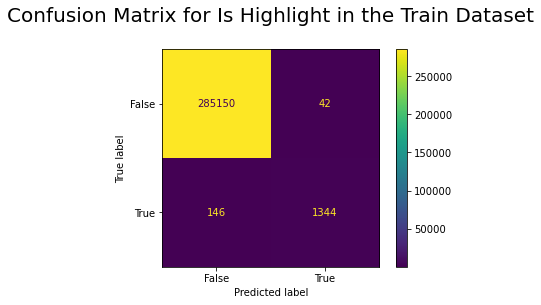

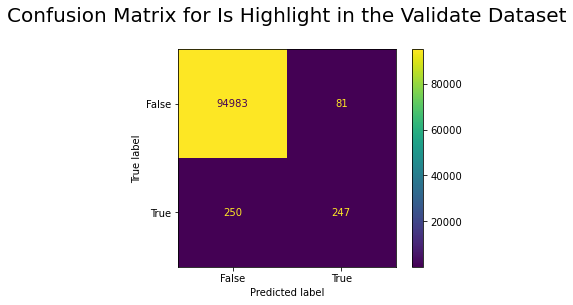

In [19]:
xgb.confusion()

In [18]:
xgb.report()


    Train Dataset : Evaluation Report — Target : Is Highlight
    _______________________________________________________________________________________
    
    True Positive = 1344 ---- False Positive = 42
    True Negative = 285150 ---- False Negative = 146
    
    Correct predictions = 286494 (True Pos + True Neg)
      Total predictions = 286682 predictions
    
    REAL POSITIVE = (TP + FN) = 1490 ---- PREDICTED POSITIVE = (TP + FP) = 1386
    
    REAL NEGATIVE = (TN + FP) = 285192 ---- PREDICTED NEGATIVE = (TN + FN) = 285296
     
        Accuracy = 99.93% -->> Correct Predictions / Total Predictions
       Precision = 96.97% -->> True Positive / Predicted Positive
             NPV = 99.95% -->> True Negative / Predicted Negative
          Recall = 90.20% -->> True Positive / Real Positive
     Specificity = 99.99% -->> True Negative / Real Negative
        f1-score = 93.46% -->> Harmonic Mean of Precision and Recall
    ______________________________________________________

In [21]:

#`code for final modeling`

xgb.test(X_test, y_test)

In [22]:
xgb.report()


    Train Dataset : Evaluation Report — Target : Is Highlight
    _______________________________________________________________________________________
    
    True Positive = 1344 ---- False Positive = 42
    True Negative = 285150 ---- False Negative = 146
    
    Correct predictions = 286494 (True Pos + True Neg)
      Total predictions = 286682 predictions
    
    REAL POSITIVE = (TP + FN) = 1490 ---- PREDICTED POSITIVE = (TP + FP) = 1386
    
    REAL NEGATIVE = (TN + FP) = 285192 ---- PREDICTED NEGATIVE = (TN + FN) = 285296
     
        Accuracy = 99.93% -->> Correct Predictions / Total Predictions
       Precision = 96.97% -->> True Positive / Predicted Positive
             NPV = 99.95% -->> True Negative / Predicted Negative
          Recall = 90.20% -->> True Positive / Real Positive
     Specificity = 99.99% -->> True Negative / Real Negative
        f1-score = 93.46% -->> Harmonic Mean of Precision and Recall
    ______________________________________________________

### Test model Takeaway<br><br>
- **Improves on baseline <u>Recall</u> from <u>0.5%</u> to an incredible <u>50%</u>.**<br><br>
- **<u>Precision</u> is maintained at <u>75%</u> showing the model only selcts out of target peices <u>25%</u> of the time.**<br><br>
- **And <u>Accuracy</u> is still over <u>99%</u>!**<br><br>
- **Would absolutely recommend this model over baseline!**

# Conclusion
## Summary of Key Findings
* High level of ________ lead to utilizing tools to determine direction rather than Domain Knoweldge
* Feature creation was able to show difference in `________` prediction
* Feature sets informed by ________ performed best on model through validation phase
    * Best model utilized ________ and Feature Engineering
* Model gain on predictive performance vs. baseline prediction was ________ on test set
    * Baseline accuracy: ________
    * Test model accuracy: ________% (Higher is better)  
    
## Suggestions and Next Steps
* No suggestions this time as the model ________ baseline predictions
* Take a look at adding more features into the model to create a more robust predictor
    - The main features we explored would be a good starting point 
* Investigate features highlighted by ________ and see how they perform
* Possible look at reducing variation within features by analyzing significance
    - Identify features were `________` variation was driven by primarly outliers 
* May consider creating different or time specific models
* Take different approach to combining the data
    - Rely more on the raw features rather than feature engineering